# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

## You can download the zipfile of data you need to do this exercise [here](https://drive.google.com/drive/folders/1_NjD9m-NH1ReHYQt9Re7AEDnKIj1mjat).

In [52]:
import zipfile

import PIL
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# Load more libraries
import os
import pickle

In [ ]:
# Extract the images from zip file
small_zip = 'readonly/small_img.zip'
with zipfile.ZipFile(small_zip, 'r') as zip:
    zip.extractall('small_img')
    print('Done Extracting!')

big_zip = 'readonly/images.zip'
with zipfile.ZipFile(big_zip, 'r') as zip:
    zip.extractall('images')
    print('Done Extracting!')

In [75]:
# A helper function to create a corpus of text from the images
# Tries to find an existing corpus saved as pickle file first
# If not found, will use PyTesseract to apply OCR on the images
# and generate corpus

def create_corpus(folder):
    text_dict = {}
    try:
        with open(f"{folder}_corpus.pkl", 'rb') as file:
            text_dict = pickle.load(file)
        print("Existing corpus found. Skipping OCR.")
    except:
        print("Existing corpus not found. Running OCR on images")
        with zipfile.ZipFile(f"readonly/{folder}.zip","r") as zip:
            for info in zip.infolist():
                image = Image.open(folder + "/" + info.filename)
                print(f'running OCR on {info.filename}')
                text = pytesseract.image_to_string(image).replace('-\n','')
                text_dict[info.filename] = text
        with open(f"{folder}_corpus.pkl", 'wb') as file:
            pickle.dump(text_dict, file)
            return text_dict

In [77]:
# Get texts from the all the images in small_img and images folder
# Store them in dictionary where the keys are the names of the images

texts_small = create_corpus('small_img')
texts_big = create_corpus('images')

Existing corpus not found. Running OCR on images
running OCR on a-0.png
running OCR on a-1.png
running OCR on a-2.png
running OCR on a-3.png


In [88]:
# Save the corpus on disk for future use

with open('small_img_corpus.pkl', 'wb') as f:
    pickle.dump(texts_small, f)
with open('images_corpus.pkl', 'wb') as f:
    pickle.dump(texts_big, f)

In [81]:
# Takes a folder with zipfile with images and a keyword to search
# Return all the images on the page where the keyword is found

def search(folder,keyword):
    corpus = texts_small if folder == 'small_img' else texts_big
    with zipfile.ZipFile(f"readonly/{folder}.zip","r") as zip:
        for info in zip.infolist():
            image = Image.open(folder + "/" +info.filename)
            text = corpus[info.filename]
        
            if keyword in text:
                print('Results found in file',info.filename)

                try:
                    faces = (face_cascade.detectMultiScale(np.array(image),1.4,4)).tolist()
                    
                    face_img = []

                    for x,y,w,h in faces:
                        face_img.append(image.crop((x,y,x+w,y+h)))

                    contact_sheet = Image.new(image.mode, (550,110*int(np.ceil(len(face_img)/5))))

                    x = 0
                    y = 0

                    for img in face_img:
                        img.thumbnail((110,110))
                        contact_sheet.paste(img, (x, y))
                        if x+110 == contact_sheet.width:
                            x=0
                            y=y+110
                        else:
                            x=x+110

                    display(contact_sheet)
                except:
                    print('But there were no faces in that file!')

Enter the string to be searched: Christopher
Results found in file a-0.png


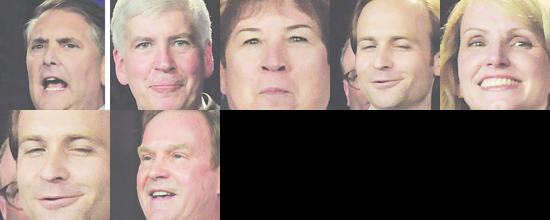

Results found in file a-3.png


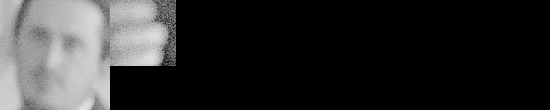

In [82]:
keyword = input("Enter the string to be searched: ")
search("small_img",keyword)

Enter the string to be searched: Mark
Results found in file a-0.png


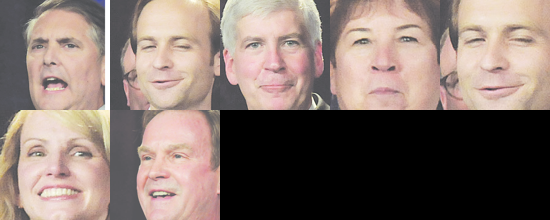

Results found in file a-1.png


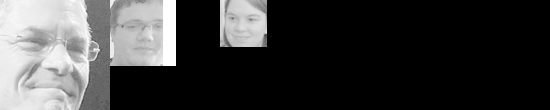

Results found in file a-10.png


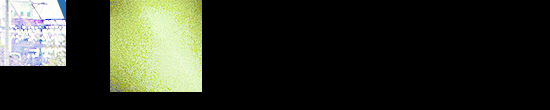

Results found in file a-13.png


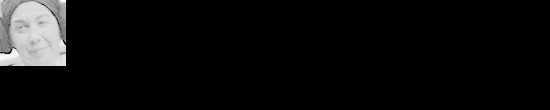

Results found in file a-2.png


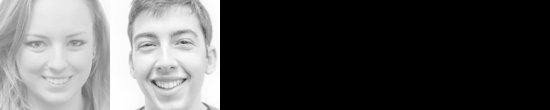

Results found in file a-3.png


In [ ]:
keyword = input("Enter the string to be searched: ")
search("images", keyword)

Congratulations! You successfully applied Optical Character Recognition and Face Detection on several images.